# Proyek Analisis Data: Bike-sharing
- **Nama:** Rahma Okta Feriska
- **Email:** oktaferiska14@gmail.com
- **ID Dicoding:** rahmaoktaf

## Menentukan Pertanyaan Bisnis

1. How do temperature and weather conditions affect the number of bike rentals?

2. How does bike rental demand change between working days and holidays?

## Import Semua Packages/Library yang Digunakan

In [76]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import IPython
from IPython.display import display
import matplotlib.dates as mdates
import seaborn as sns

## Data Wrangling

### Gathering Data

In [77]:
df = pd.read_csv("day.csv")
df.head() #print the first 5 rows

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [78]:
df.shape #print the number of rows and columns

(731, 16)

In [79]:
df.columns #print name of columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

**Insight:**
- The dataset used for this project provides daily aggregated bike-rental counts.
- The dataset records bike-rental for 731 days hence it has 731 rows.
- The dataset has 16 features which are 'instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', and 'cnt'.

### Assessing Data

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [81]:
df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [82]:
print("Number of duplicate data: ", df.duplicated().sum())

Number of duplicate data:  0


**Insight:**
- No missing value found in the dataset.
- No duplicate data found in the dataset.

### Cleaning Data

In [83]:
df = df.drop(columns=['instant', 'season', 'yr', 'mnth', 'weekday', 'atemp', 'hum', 'windspeed'])

**Insight:**
- Drop the features that are unecessary for this analysis.

## Exploratory Data Analysis (EDA)

### Explore ...

In [84]:
df.describe()

,holiday,workingday,weathersit,temp,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.028728,0.683995,1.395349,0.495385,848.176471,3656.172367,4504.348837
std,0.167155,0.465233,0.544894,0.183051,686.622488,1560.256377,1937.211452
min,0.000000,0.000000,1.000000,0.059130,2.000000,20.000000,22.000000
25%,0.000000,0.000000,1.000000,0.337083,315.500000,2497.000000,3152.000000
50%,0.000000,1.000000,1.000000,0.498333,713.000000,3662.000000,4548.000000
75%,0.000000,1.000000,2.000000,0.655417,1096.000000,4776.500000,5956.000000
max,1.000000,1.000000,3.000000,0.861667,3410.000000,6946.000000,8714.000000


Rentals for each weather condiiton.

In [85]:
weather_cluster = df.groupby(by="weathersit").agg({
    "cnt": ["max", "min", "mean", "std"],      # Total rentals
    "casual": ["max", "min", "mean", "std"],   # Casual user
    "registered": ["max", "min", "mean", "std"], #Registered user
})

display(weather_cluster)

cnt                                casual                  \
             max  min         mean          std    max min        mean   
weathersit                                                               
1           8714  431  4876.786177  1879.483989   3410  15  964.030238   
2           8362  605  4035.862348  1809.109918   3155   9  687.352227   
3           4639   22  1803.285714  1240.284449   1264   2  185.476190   

                       registered                                 
                   std        max  min         mean          std  
weathersit                                                        
1           700.476488       6946  416  3912.755940  1533.347265  
2           619.082767       6844  491  3348.510121  1463.566884  
3           260.975022       4324   20  1617.809524  1068.290954

Convert the normalized temperature in Celcius and cluster the temperature into three categories: Low, Medium, and High.

Low: [0-15] Celcius degree

Medium: (15,30] Celsius degree

High: (30,41] Celcius degree

In [86]:
# temp is normalized between 0 and 1, so multiply by 41 to get the real data in Celsius
df['temp_celsius'] = df['temp'] * 41

# Create bins for temperature clustering
bins = [0, 15, 30, 41]  # Define bin edges for temperature ranges
labels = ['Low', 'Medium', 'High']  # Labels for the bins

# Create a new column 'temp_cluster' that stores the clustered temperature
df['temp_cluster'] = pd.cut(df['temp_celsius'], bins=bins, labels=labels, include_lowest=True)
df.head()

,dteday,holiday,workingday,weathersit,temp,casual,registered,cnt,temp_celsius,temp_cluster
0,2011-01-01,0,0,2,0.344167,331,654,985,14.110847,Low
1,2011-01-02,0,0,2,0.363478,131,670,801,14.902598,Low
2,2011-01-03,0,1,1,0.196364,120,1229,1349,8.050924,Low
3,2011-01-04,0,1,1,0.200000,108,1454,1562,8.200000,Low
4,2011-01-05,0,1,1,0.226957,82,1518,1600,9.305237,Low


In [87]:
df.to_csv("final_data.csv", index=False) #save the final data that later will be used for making streamlit dashboard

Rentals for each temperature categories

In [88]:
temp_stats = df.groupby(by="temp_cluster").agg({
    "cnt": ["max", "min", "mean", "std"],      # Total rentals
    "casual": ["max", "min", "mean", "std"],   # Casual user
    "registered": ["max", "min", "mean", "std"], #Registered user
})

display(temp_stats)

<ipython-input-88-30f87d91912f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_stats = df.groupby(by="temp_cluster").agg({


cnt                                 casual                    \
               max   min         mean          std    max  min         mean   
temp_cluster                                                                  
Low           5992   431  2833.316742  1428.496508   1658    9   328.072398   
Medium        8714    22  5198.627854  1718.521863   3410    2  1063.954338   
High          7592  3285  5409.958333  1259.995198   2562  513  1131.958333   

                         registered                                  
                     std        max   min         mean          std  
temp_cluster                                                         
Low           290.210134       5520   416  2505.244344  1312.533485  
Medium        711.745775       6946    20  4134.673516  1424.077883  
High          507.405564       6452  2298  4278.000000  1132.134031

Rentals in holiday and no-holiday

In [89]:
holiday_stats = df.groupby(by="holiday").agg({
    "cnt": ["max", "min", "mean", "std"],      # Total rentals
    "casual": ["max", "min", "mean", "std"],   # Casual user
    "registered": ["max", "min", "mean", "std"], # Registered user
})

display(holiday_stats)

cnt                                 casual                    \
          max   min         mean          std    max  min         mean   
holiday                                                                  
0        8714    22  4527.104225  1929.013947   3410    2   841.771831   
1        7403  1000  3735.000000  2103.350660   3065  117  1064.714286   

                    registered                                 
                std        max  min         mean          std  
holiday                                                        
0        680.528529       6946   20  3685.332394  1553.704431  
1        860.046809       5172  573  2670.285714  1492.860246

Rentals in working days and non-working days.

In [90]:
workingday_stats = df.groupby(by="workingday").agg({
    "cnt": ["max", "min", "mean", "std"],      # Total rentals
    "casual": ["max", "min", "mean", "std"],   # Casual user
    "registered": ["max", "min", "mean", "std"], # Registered user
})

display(workingday_stats)

cnt                                casual                   \
             max  min         mean          std    max min         mean   
workingday                                                                
0           8714  605  4330.168831  2052.141245   3410  54  1371.134199   
1           8362   22  4584.820000  1878.415583   2469   2   606.570000   

                       registered                                 
                   std        max  min         mean          std  
workingday                                                        
0           873.064794       5966  451  2959.034632  1293.867686  
1           391.496032       6946   20  3978.250000  1568.692453

**Insight:**
- The number of rentals, both casual and registered user, when weather=1 is higher than when weather=2 though the difference is not significant. However, the number of rentals when weather=3 is much lower compared to both weather=1 and weather=2.
- The number of rentals, both casual and registered user, from highest to lowest is in the following order: high, medium, and low temperature.
- The average number of rentals from casual user is higher on holiday than non-holiday while the average number of rentals from registered user is lower on holiday than non-holiday.
- The average number of rentals from registered user is higher on working days than on non-working days while the average number of rentals from casual user is lower on working days than on non-working days.

Weather explanation:

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

## Visualization & Explanatory Analysis

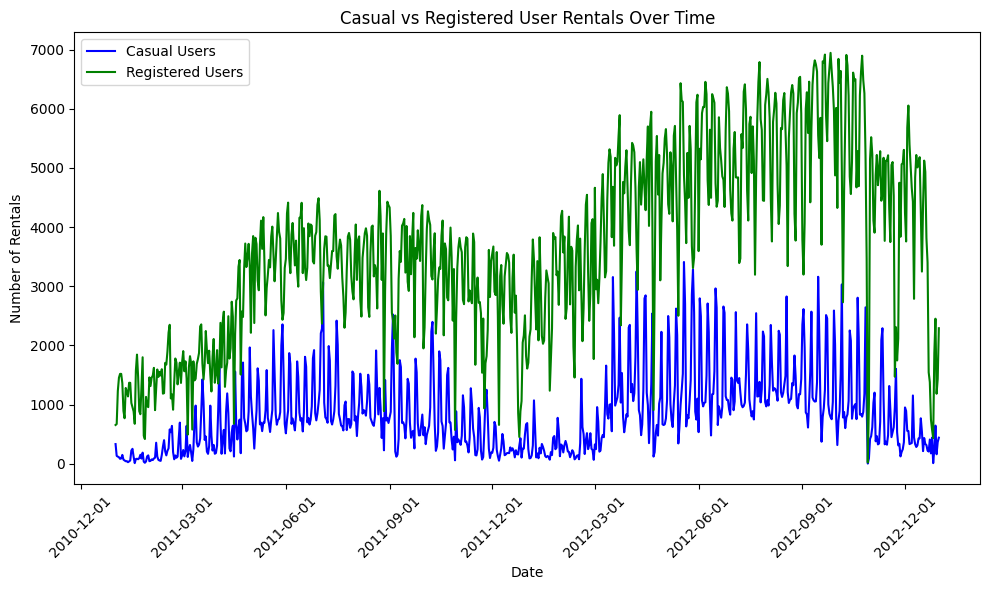

In [91]:
# Ensure 'dteday' is in datetime format
df['dteday'] = pd.to_datetime(df['dteday'])

# Set 'dteday' as the index for time series plotting
df.set_index('dteday', inplace=True)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot casual users over time
plt.plot(df.index, df['casual'], label='Casual Users', color='blue')

# Plot registered users over time
plt.plot(df.index, df['registered'], label='Registered Users', color='green')

# Add titles and labels
plt.title('Casual vs Registered User Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Rentals')

# Add a legend
plt.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust x-axis ticks to show fewer dates while keeping date format
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Display the plot
plt.tight_layout()
plt.show()

### Pertanyaan 1:

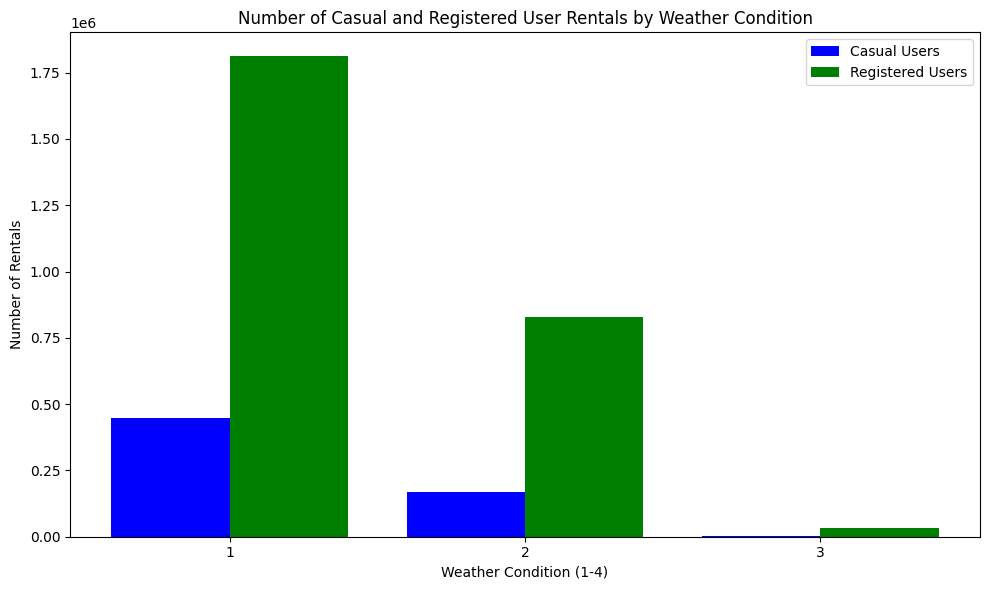

In [92]:
# Group by 'weathersit' and sum the rentals
weather_data = df.groupby('weathersit').agg({
    'casual': 'sum',
    'registered': 'sum'
}).reset_index()

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot casual users
plt.bar(weather_data['weathersit'] - 0.2, weather_data['casual'], width=0.4, label='Casual Users', color='blue')

# Plot registered users
plt.bar(weather_data['weathersit'] + 0.2, weather_data['registered'], width=0.4, label='Registered Users', color='green')

# Add titles and labels
plt.title('Number of Casual and Registered User Rentals by Weather Condition')
plt.xlabel('Weather Condition (1-4)')
plt.ylabel('Number of Rentals')

# Add a legend
plt.legend()

# Display the plot
plt.xticks(weather_data['weathersit'])
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


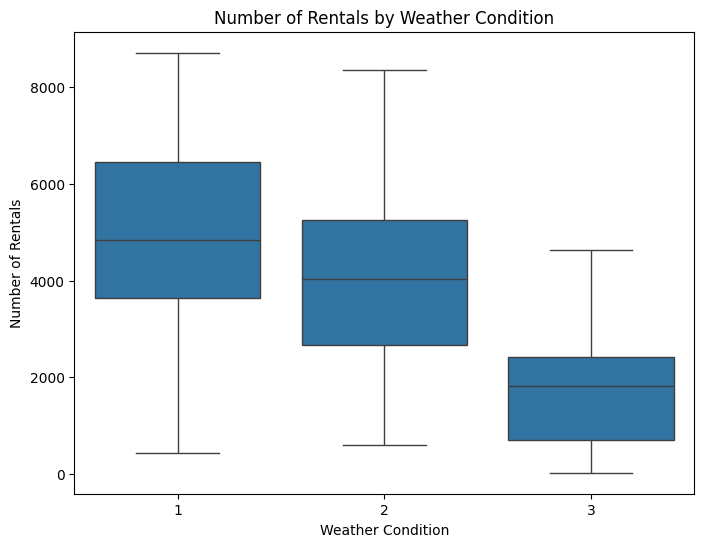

In [93]:
# Create a box plot
plt.figure(figsize=(8,6))
sns.boxplot(x='weathersit', y='cnt', data=df)

# Add labels and title
plt.xlabel('Weather Condition')
plt.ylabel('Number of Rentals')
plt.title('Number of Rentals by Weather Condition')

plt.show()


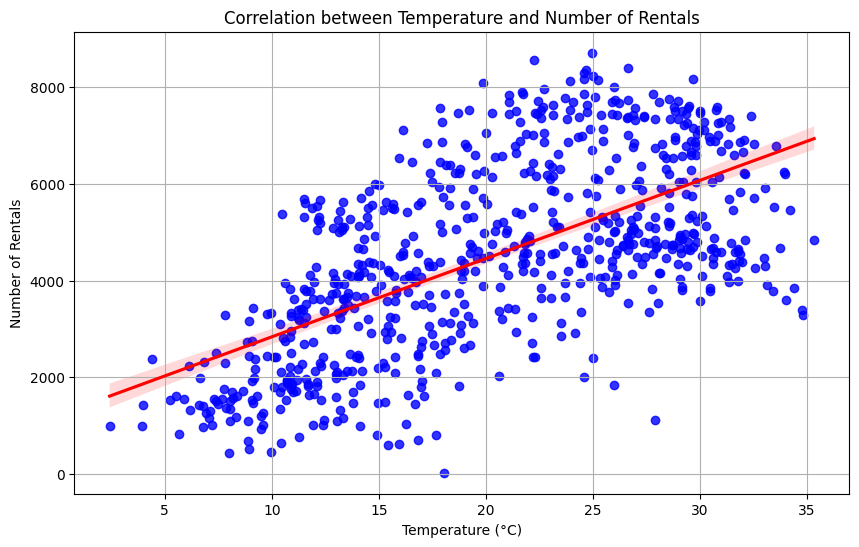

In [94]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create scatter plot with regression line
sns.regplot(x='temp_celsius', y='cnt', data=df, scatter_kws={'color':'blue'}, line_kws={'color':'red'})

# Add labels and title
plt.xlabel('Temperature (°C)')
plt.ylabel('Number of Rentals')
plt.title('Correlation between Temperature and Number of Rentals')

# Show the plot
plt.grid(True)
plt.show()


### Pertanyaan 2:

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


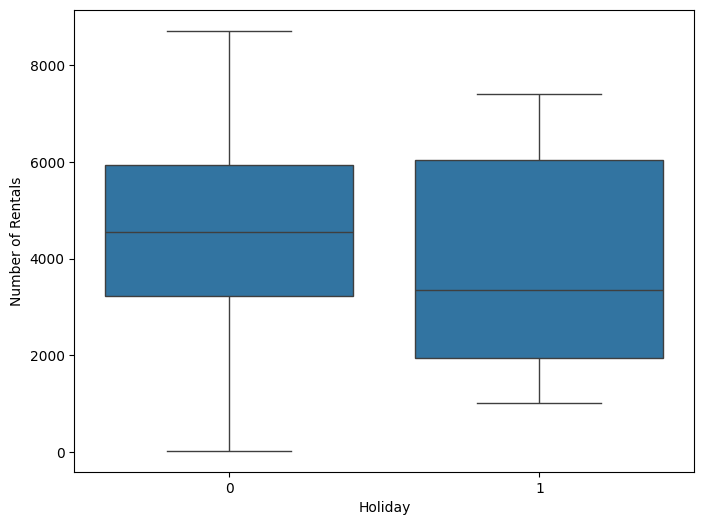

In [95]:
# Create a box plot
plt.figure(figsize=(8,6))
sns.boxplot(x='holiday', y='cnt', data=df)

# Add labels and title
plt.xlabel('Holiday')
plt.ylabel('Number of Rentals')

plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


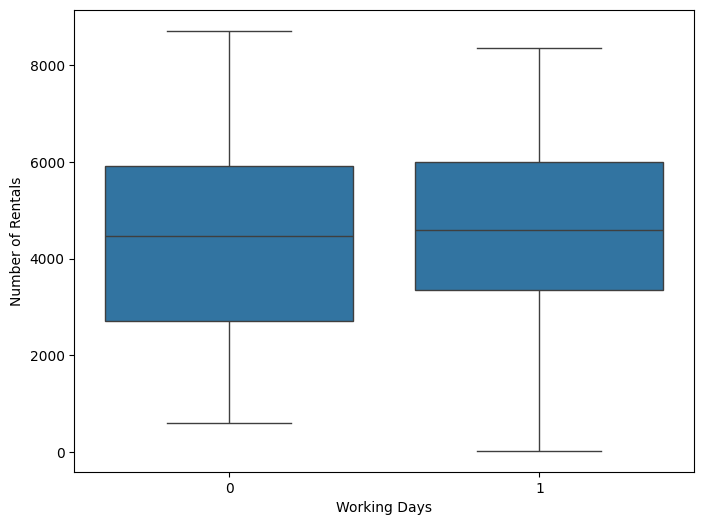

In [96]:
# Create a box plot
plt.figure(figsize=(8,6))
sns.boxplot(x='workingday', y='cnt', data=df)

# Add labels and title
plt.xlabel('Working Days')
plt.ylabel('Number of Rentals')

plt.show()


**Insight:**
- Number of rentals from registered users is higher than casual users.
- The number of rentals from highest to lowest is in the following order: weather=1, weather=2, weather=3.
- The temperature is linearly correlated to number of rentals.
- The number of rentals on holidays and non-holidays are similar, but the variability in the number of rentals might be slightly higher on holiday.
- The number of rentals on working days and non-working days are similar, but the variability in the number of rentals might be slightly higher on non-working days.

## Conclusion

1. The number of rentals increases as the temperature rises, and rentals are higher in good weather conditions, indicating that both temperature and weather affect the demand for rentals.

2. Bike rental demand is higher on both non-holidays and working days and lower on both holidays and non-working days.